## A.I. Assignment 6 Building Classification Models With Pytorch

## Learning Goals

First we assume a basic understanding of and suggest recommendations for:
    * Python
    * Numpy (https://github.com/keineahnung2345/Deep-Learning-Andrew-Ng/blob/master/Course1-Neural%20Networks%20and%20Deep%20Learning/Week2%20-%20Neural%20Networks%20Basics/Python+Basics+With+Numpy+v3.ipynb)
    * Torch (https://www.learnpytorch.io/00_pytorch_fundamentals/)
    * Neural Networks Fundamentals (https://cs231n.github.io/neural-networks-1/)
    * Linear Algebra and Gradients Intuitions (https://www.youtube.com/watch?v=IHZwWFHWa-w&t=8s)

We will use this concepts for everything we do from now on.

By the end of this lab, you should be able to:


### Task

* Standard Pytorch Worflow
* Deep Dive in Linear Classification
* Go through the recap of a linear model/simple models
* Build a simple classsifier on non liniar data with a liniar model (first attempt)
* Build a simple classsifier using non liniar activation function
* Build a multiclass classifier

This one will be more intense and all 9 exercises are 1 point each.


## Standard Pytorch Workflow When Takling a task

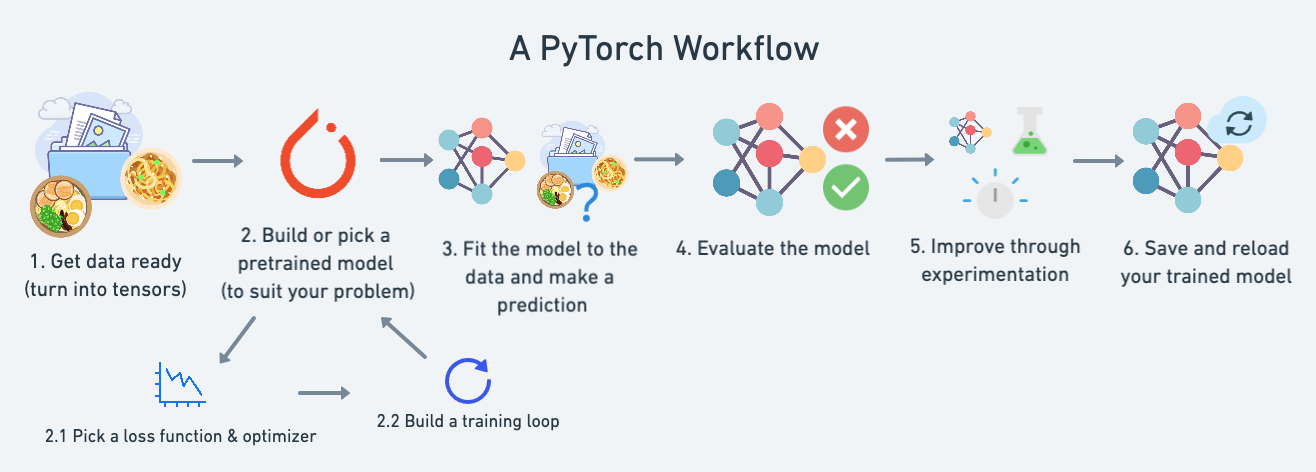
Source : https://www.learnpytorch.io/01_pytorch_workflow/

1 **Prepare your data** by loading the dataset and transforming it into a format that can be used for training and testing your model. This may include data cleaning, splitting the data into training and validation sets, and applying any necessary data augmentation techniques.

2 **Define your model architecture** using PyTorch's neural network modules. This involves creating the layers of your model, specifying their sizes and activation functions, and connecting them together.

 * 2.1 **Choose an optimizer** and a loss function for your model. The optimizer determines how the model's weights are updated during training, while the loss function measures how well the model is performing on the training data.

* 2.2 **Develop a training loop** that iterates over your training data in batches, applies the model to each batch, calculates the loss, and updates the model's weights using the optimizer.

3 **Evaluate your model's performance** on the validation set. This involves applying the model to the validation data, calculating the model's predictions, and comparing them to the actual labels.

4 **Make any necessary adjustments** to your model, such as changing the optimizer, adding regularization, or adjusting the learning rate, and retrain the model if necessary.

Once your model is trained and validated, use it to make predictions on new data.

5 Finally, **save your trained model** for later use or deployment in a production environment.

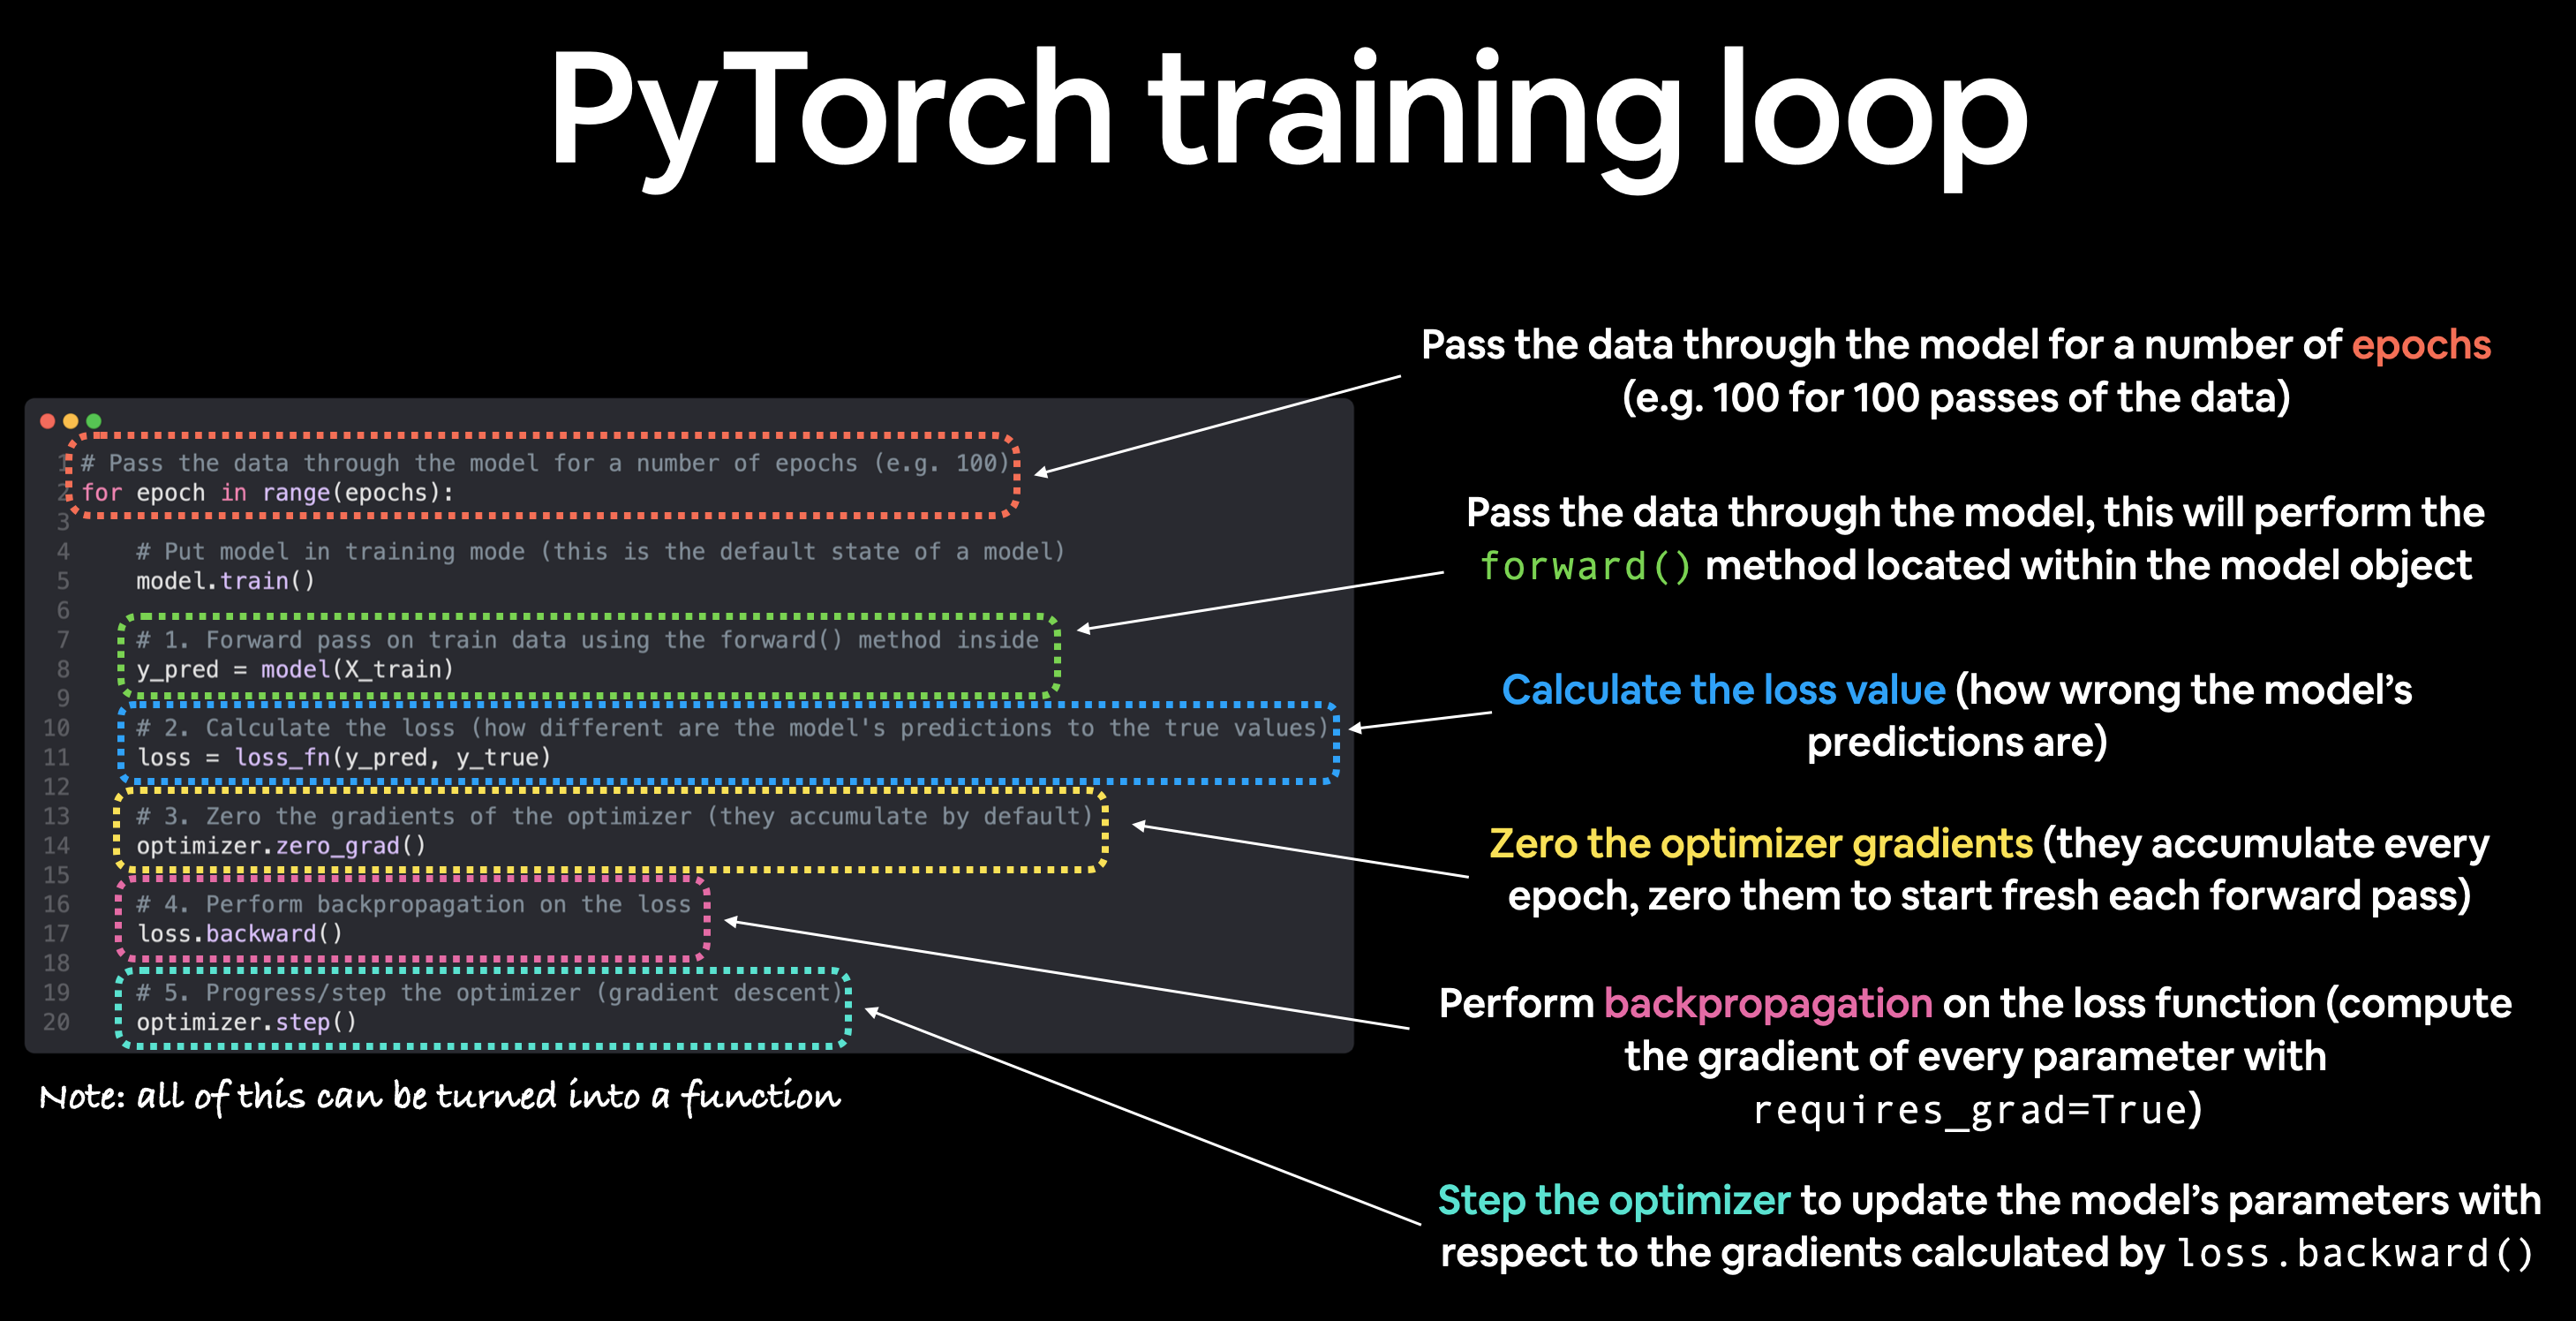!

## Understanding various ML Problems



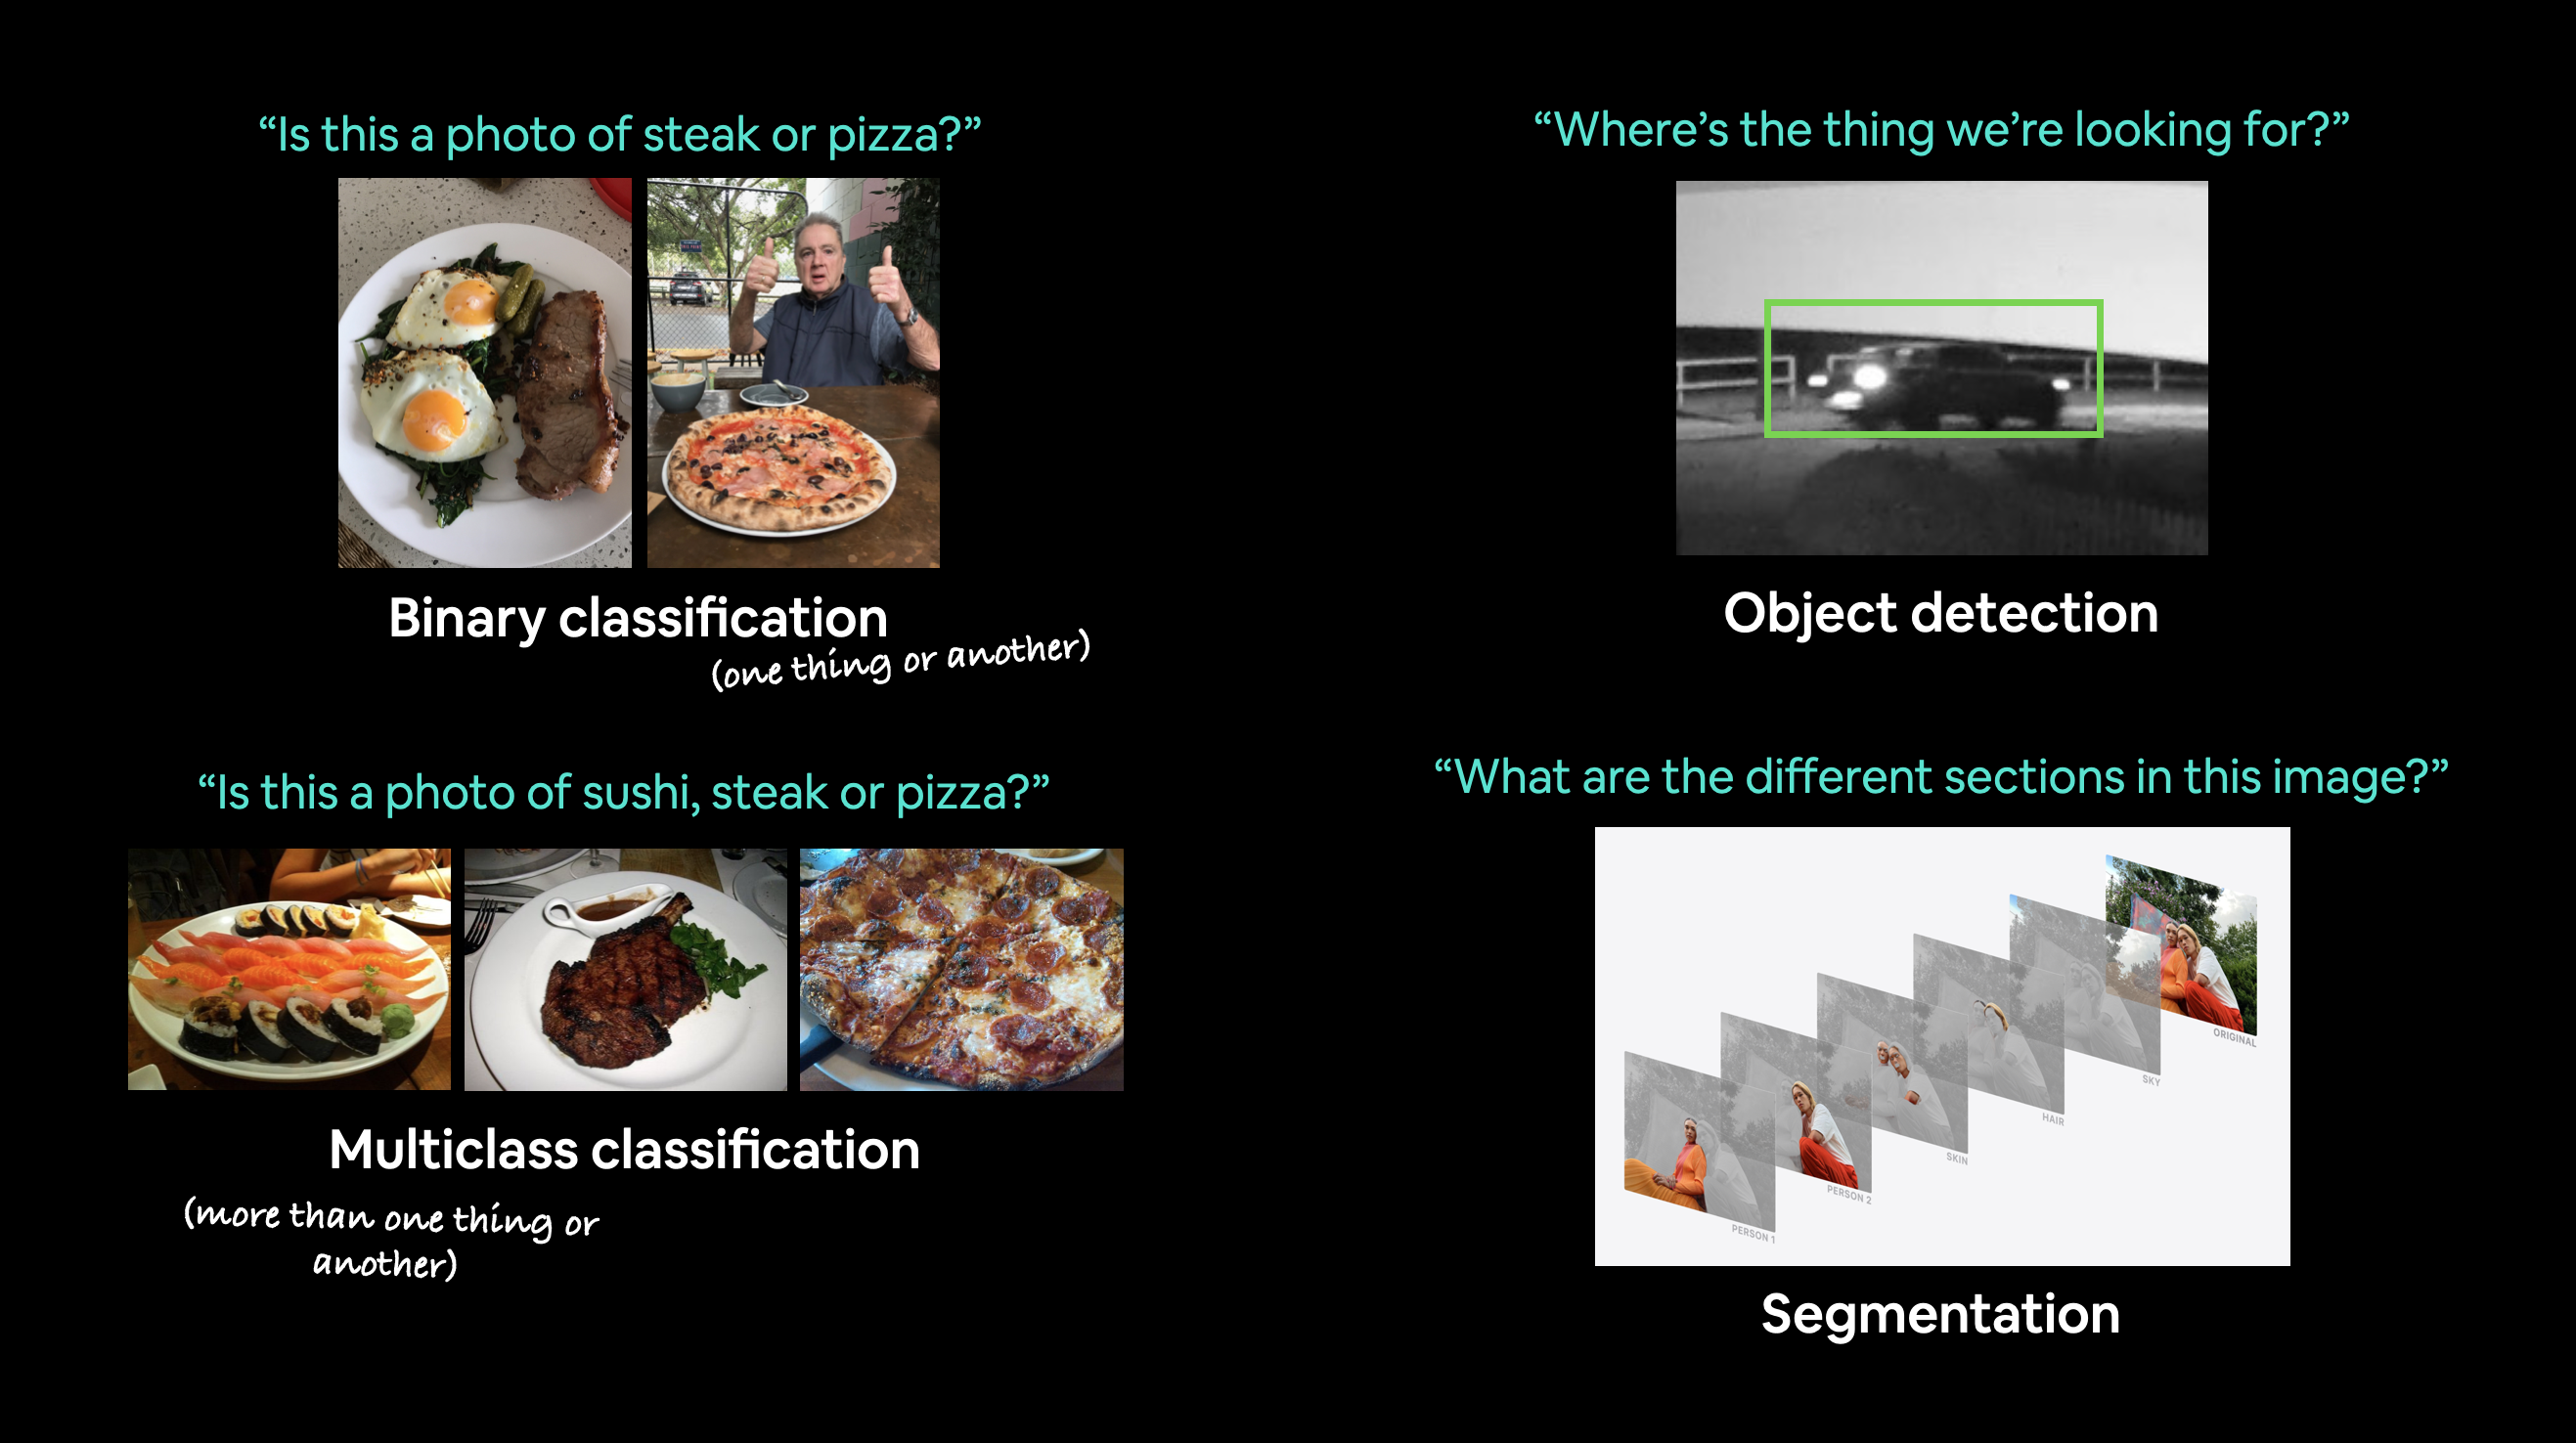!roblem type	What is it?	Example
Binary classification	Target can be one of two options, e.g. yes or no	Predict whether or not someone has heart disease based on their health parameters.
Multi-class classification	Target can be one of more than two options	Decide whether a photo of is of food, a person or a dog.
Multi-label classification	Target can be assigned more than one option	Predict what categories should be assigned to a Wikipedia article (e.g. mathematics, science & philosohpy).

Source : https://www.learnpytorch.io/01_pytorch_workflow/

| Problem type              | What is it?                                                      | Example                                                                    |
| ------------------------ | ---------------------------------------------------------------- | -------------------------------------------------------------------------- |
| Binary classification     | Target can be one of two options, e.g. yes or no                 | Predict whether or not someone has heart disease based on their health parameters. |
| Multi-class classification| Target can be one of more than two options                       | Decide whether a photo is of food, a person or a dog.                       |
| Multi-label classification| Target can be assigned more than one option | Predict what categories should be assigned to a Wikipedia article (e.g. mathematics, science & philosohpy).  

Today we will be looking into binary classification and touch upon multiclass classification

## To better understand simple neural netowrks check out:
https://playground.tensorflow.org/

It has the circle data we are going to use now

## Small Recap 

In [102]:
# Import PyTorch and matplotlib
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.6.0+cu124'

### Are we using a GPU ?

In [103]:
# Setup device agnostic code
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


## Let's look at the perceptron from lab 04 as an example for all the steps

As a reminder here we are making a neural network that acts like an OR gate

#### 1 Prepare Data

In [104]:
x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [0], [0], [1]], dtype=torch.float32)

In [105]:
if x.shape[0] == y.shape[0]:
    print("The shapes of our data match !")

The shapes of our data match !


#### 2 Define Model

Firstly, the code defines a subclass of nn.Module, which is a superclass that almost all PyTorch models inherit from.

The class constructor creates two nn.Linear layers with the capacity to handle the input and output shapes of the input features X and target labels y.

Next, the forward() method is defined, which contains the computations for the forward pass of the model.

Finally, an instance of the model class is created and sent to the designated device for computation.

In [106]:
class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim) # takes in {input_dim}  features (X), produces {output_dim} features
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        # x = self.linear(x)
        # x = self.activation(x)
        ## The upper line and lower are equivalent
        x =self.activation(self.linear(x)) #Takes in the computation through the linear layer and the resulting features of the linear layer through the activation
        return x


In [107]:
# Example usage:
model = Perceptron(2, 1)

#### 2.1 Chose appropriate optimizer

In [108]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.2)

#### 2.2 Create Training Loop

In [109]:
num_epochs = 4000
loss_values = []
for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    # Print the loss every 100 epochs
    loss_values.append(loss.item()) # This is so that we can look at an image of our loss
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/4000], Loss: 0.3519
Epoch [200/4000], Loss: 0.2537
Epoch [300/4000], Loss: 0.2004
Epoch [400/4000], Loss: 0.1659
Epoch [500/4000], Loss: 0.1416
Epoch [600/4000], Loss: 0.1234
Epoch [700/4000], Loss: 0.1092
Epoch [800/4000], Loss: 0.0979
Epoch [900/4000], Loss: 0.0887
Epoch [1000/4000], Loss: 0.0810
Epoch [1100/4000], Loss: 0.0745
Epoch [1200/4000], Loss: 0.0689
Epoch [1300/4000], Loss: 0.0641
Epoch [1400/4000], Loss: 0.0599
Epoch [1500/4000], Loss: 0.0562
Epoch [1600/4000], Loss: 0.0529
Epoch [1700/4000], Loss: 0.0500
Epoch [1800/4000], Loss: 0.0474
Epoch [1900/4000], Loss: 0.0450
Epoch [2000/4000], Loss: 0.0429
Epoch [2100/4000], Loss: 0.0409
Epoch [2200/4000], Loss: 0.0391
Epoch [2300/4000], Loss: 0.0375
Epoch [2400/4000], Loss: 0.0360
Epoch [2500/4000], Loss: 0.0346
Epoch [2600/4000], Loss: 0.0333
Epoch [2700/4000], Loss: 0.0321
Epoch [2800/4000], Loss: 0.0309
Epoch [2900/4000], Loss: 0.0299
Epoch [3000/4000], Loss: 0.0289
Epoch [3100/4000], Loss: 0.0280
Epoch [3200/4000]

##### Create a function to plot our loss curve

In [110]:
from typing import List
def plot_loss(loss_values: List[float]):
    plt.plot(loss_values)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Curve')
    plt.show()

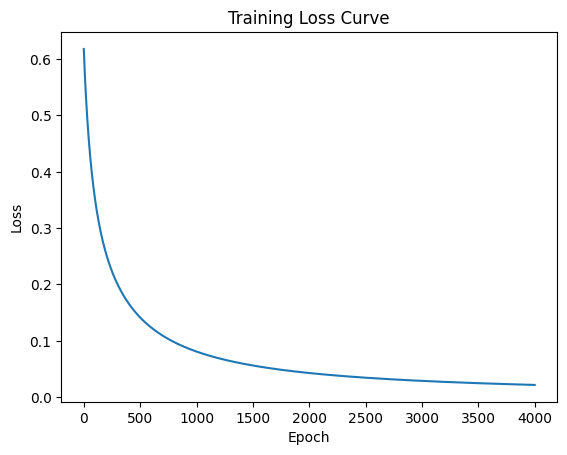

In [111]:
plot_loss(loss_values)

##### 4 Evaluate Your Model

In [112]:
# Test the model on new data
test_input = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
test_output = model(test_input)
print(test_output)


tensor([[2.4444e-05],
        [2.5197e-02],
        [2.5197e-02],
        [9.6470e-01]], grad_fn=<SigmoidBackward0>)


#### 5 Make necessary adjustments
In this case we don't understand exactly what e-01 e-02 values mean so we decide on a threshold and we 

In [113]:
output = (test_output > 0.5).float()

In [114]:
print(output)

tensor([[0.],
        [0.],
        [0.],
        [1.]])


##### 6 Save the Model

In [115]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)


# 2. Create model save path 
MODEL_NAME = "01_pytorch_perceptron.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)


Saving model to: models/01_pytorch_perceptron.pth


## Deep Dive Classification problems

## Architecture of a classification neural network
Courtesy of https://www.learnpytorch.io/01_pytorch_workflow/

Before we get into writing code, let's look at the general architecture of a classification neural network.

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| **Input layer shape** (`in_features`) | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| **Hidden layer(s)** | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| **Neurons per hidden layer** | Problem specific, generally 10 to 512 | Same as binary classification |
| **Output layer shape** (`out_features`) | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| **Hidden layer activation** | Usually [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU) (rectified linear unit) but [can be many others](https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions) | Same as binary classification |
| **Output activation** | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) ([`torch.sigmoid`](https://pytorch.org/docs/stable/generated/torch.sigmoid.html) in PyTorch)| [Softmax](https://en.wikipedia.org/wiki/Softmax_function) ([`torch.softmax`](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html) in PyTorch) |
| **Loss function** | [Binary crossentropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) in PyTorch) | Cross entropy ([`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) in PyTorch) |
| **Optimizer** | [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) (stochastic gradient descent), [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) (see [`torch.optim`](https://pytorch.org/docs/stable/optim.html) for more options) | Same as binary classification |

Of course, this ingredient list of classification neural network components will vary depending on the problem you're working on.

But it's more than enough to get started.

We're going to gets hands-on with this setup throughout this notebook.

## We provided an accuracy function to be on the same boat with everyone

In [116]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

## Let's Make our own circles dataset


### 1 Data

In [117]:
from sklearn.datasets import make_circles


# Make 2000 samples 
n_samples = 2000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.05, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

In [118]:
import numpy as np

# Turn data into tensors
# Otherwise this causes issues with computations later on
if isinstance(X, np.ndarray):
    X = torch.from_numpy(X).type(torch.float)
    y = torch.from_numpy(y).type(torch.float)
elif isinstance(X, torch.Tensor):
    X = X.type(torch.float)
    y = y.type(torch.float)
else:
    raise ValueError("X must be a numpy array or a torch tensor")

In [119]:
print(f"Last 5 X features:\n{X[5:]}") #Wink wink numpy slicing
print(f"Last 5 y labels:\n{y[5:]}")

Last 5 X features:
tensor([[-0.1930,  0.7703],
        [ 1.0001, -0.3373],
        [-0.1127, -0.8118],
        ...,
        [ 0.6222, -0.7182],
        [-0.7904,  0.1368],
        [ 0.5993,  0.5590]])
Last 5 y labels:
tensor([1., 0., 1.,  ..., 0., 1., 1.])


### Vizualize the dataset
Extra : Vary the noise to observe different dataset generation

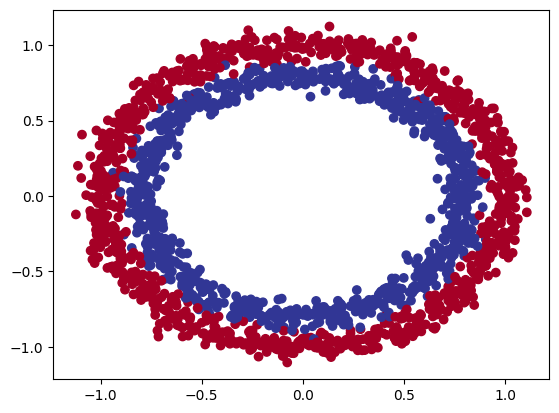

In [120]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

Ex 1

Analyse the data: print the shape of our toy dataset

What's the second dimension on X?

Print some values of the toy dataset


In [121]:
# second dimension is the number of features(2)
print(X.shape)

# print some values of the toy dataset
print(X[0:5])
print(y[0:5])


torch.Size([2000, 2])
tensor([[ 0.4452, -0.5584],
        [-0.6263,  0.8151],
        [-0.4009,  0.7175],
        [ 0.8309, -0.6262],
        [-0.1443,  0.7514]])
tensor([1., 0., 1., 0., 1.])


Ex 2 :

In the next step, we need to prepare the data to be compatible with PyTorch and for modelling. To achieve this, we have two tasks to complete:

Convert our data from NumPy arrays to PyTorch tensors as PyTorch works more efficiently with tensors.
Create a split between the training and testing sets. The model is trained on the training set to learn the relationships between X and y. Afterward, the model's learned patterns are evaluated on the test dataset.

In [131]:
from sklearn.model_selection import train_test_split

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)


print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

torch.Size([1600, 2]) torch.Size([400, 2]) torch.Size([1600]) torch.Size([400])


### 2 Baseline (Dumb) Model

Ex 3 Build a model similar to the perceptron with 2 linear layers (no activation function)
Please be mindfull of your model names (distinct names)
If capable move your model to the gpu

In [123]:
# Your code here

#### Equivalent of the circle model using nn sequential

In [132]:
model_circle = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
)

model_circle = model_circle.to(device)

model_circle

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

### 2.1 Setup loss function and optimizer

For a binary classification problem you'll often use [binary cross entropy](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a) as the loss function.

However, the same optimizer function can often be used across different problem spaces.

For example, the stochastic gradient descent optimizer (SGD, `torch.optim.SGD()`) can be used for a range of problems, so can too the Adam optimizer (`torch.optim.Adam()`). 

| Loss function/Optimizer | Problem type | PyTorch Code |
| ----- | ----- | ----- |
| Stochastic Gradient Descent (SGD) optimizer | Classification, regression, many others. | [`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) |
| Adam Optimizer | Classification, regression, many others. | [`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) |
| Binary cross entropy loss | Binary classification | [`torch.nn.BCELossWithLogits`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) or [`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) |
| Cross entropy loss | Mutli-class classification | [`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) |
| Mean absolute error (MAE) or L1 Loss | Regression | [`torch.nn.L1Loss`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html) | 
| Mean squared error (MSE) or L2 Loss | Regression | [`torch.nn.MSELoss`](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss) |  

*Table of various loss functions and optimizers, there are more but these some common ones you'll see.*

Since we're working with a binary classification problem, let's use a binary cross entropy loss function.

> **Note:** Recall a **loss function** is what measures how *wrong* your model predictions are, the higher the loss, the worse your model.


Therefore, torch.nn.BCEWithLogitsLoss() is recommended for binary classification tasks. However, for more advanced usage, one may choose to separate the nn.Sigmoid and torch.nn.BCELoss() components, though that is beyond the scope of this notebook. We will now create a loss function and an optimizer.





For the optimizer we'll use `torch.optim.SGD()` to optimize the model parameters with learning rate 0.1.

In [133]:
loss_fn = nn.BCELoss().to(device)
# optimizer = torch.optim.SGD(model_circle.parameters(), lr=0.1)
optimizer = torch.optim.Adam(model_circle.parameters(), lr=0.01)

In [126]:
# 3 Evaluate Model

model_circle.eval()

with torch.no_grad():
    y_pred = model_circle(X_test)
    y_pred = y_pred.squeeze()
    y_pred_probs = torch.sigmoid(y_pred)
    y_pred = (y_pred_probs > 0.5).float()

    loss = loss_fn(y_pred, y_test)
    acc = accuracy_fn(y_test, y_pred)
    print(f"Loss: {loss}, Accuracy: {acc}")

Loss: 49.5, Accuracy: 50.5


In [127]:
from utils import plot_decision_boundary

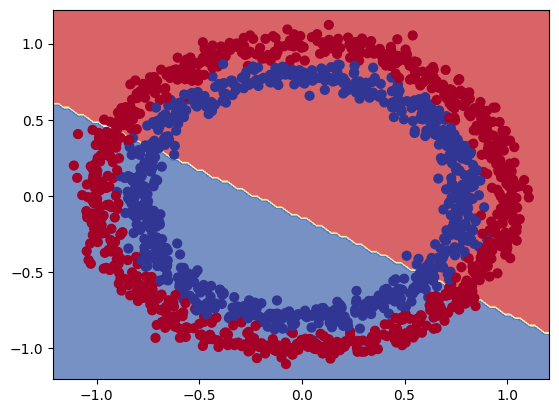

In [128]:
plot_decision_boundary(model_circle, X_train, y_train)

### 2.2 Training Loop

<details>
    <summary>PyTorch training loop steps</summary>
    <ol>
        <li><b>Forward pass</b> - The model goes through all of the training data once, performing its
            <code>forward()</code> function
            calculations (<code>model(x_train)</code>).
        </li>
        <li><b>Calculate the loss</b> - The model's outputs (predictions) are compared to the ground truth and evaluated
            to see how
            wrong they are (<code>loss = loss_fn(y_pred, y_train</code>).</li>
        <li><b>Zero gradients</b> - The optimizers gradients are set to zero (they are accumulated by default) so they
            can be
            recalculated for the specific training step (<code>optimizer.zero_grad()</code>).</li>
        <li><b>Perform backpropagation on the loss</b> - Computes the gradient of the loss with respect for every model
            parameter to
            be updated (each parameter
            with <code>requires_grad=True</code>). This is known as <b>backpropagation</b>, hence "backwards"
            (<code>loss.backward()</code>).</li>
        <li><b>Step the optimizer (gradient descent)</b> - Update the parameters with <code>requires_grad=True</code>
            with respect to the loss
            gradients in order to improve them (<code>optimizer.step()</code>).</li>
    </ol>
</details>



In [129]:
# Ex 5 Build the training loop
# Every 10 epochs rint the loss and the accuracy and save them in a loss_curve, acc_curve
# Also plot them

In [134]:
num_epochs = 200
loss_values = []
acc_values = []

for epoch in range(num_epochs):
    model_circle.train()
    y_pred = torch.sigmoid(model_circle(X_train).squeeze())
    loss = loss_fn(y_pred, y_train)
    loss_values.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_circle.eval()
    with torch.no_grad():
        y_pred = torch.sigmoid(model_circle(X_test).squeeze())
        loss = loss_fn(y_pred, y_test)
        loss_values.append(loss.item())
        y_pred_classes = (y_pred > 0.5).float()
        acc = accuracy_fn(y_test, y_pred_classes)
        acc_values.append(acc)

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item()}, Accuracy: {acc}")

# Note: loss_values and acc_values are already scalar values (from .item()),
# so they don't need to be moved to any device

Epoch 0, Loss: 0.6931492686271667, Accuracy: 51.0
Epoch 10, Loss: 0.6932862997055054, Accuracy: 50.5
Epoch 20, Loss: 0.6933409571647644, Accuracy: 44.0
Epoch 30, Loss: 0.6934422254562378, Accuracy: 46.5
Epoch 40, Loss: 0.6932474970817566, Accuracy: 44.0
Epoch 50, Loss: 0.693305492401123, Accuracy: 47.75
Epoch 60, Loss: 0.6933081150054932, Accuracy: 43.75
Epoch 70, Loss: 0.6933310031890869, Accuracy: 46.0
Epoch 80, Loss: 0.69331955909729, Accuracy: 43.75
Epoch 90, Loss: 0.6933186054229736, Accuracy: 46.0
Epoch 100, Loss: 0.6933141350746155, Accuracy: 44.5
Epoch 110, Loss: 0.6933150887489319, Accuracy: 45.0
Epoch 120, Loss: 0.6933143734931946, Accuracy: 45.25
Epoch 130, Loss: 0.6933140158653259, Accuracy: 45.25
Epoch 140, Loss: 0.6933144927024841, Accuracy: 45.25
Epoch 150, Loss: 0.6933143734931946, Accuracy: 45.25
Epoch 160, Loss: 0.6933143734931946, Accuracy: 45.25
Epoch 170, Loss: 0.6933143734931946, Accuracy: 45.25
Epoch 180, Loss: 0.6933141946792603, Accuracy: 45.25
Epoch 190, Loss:

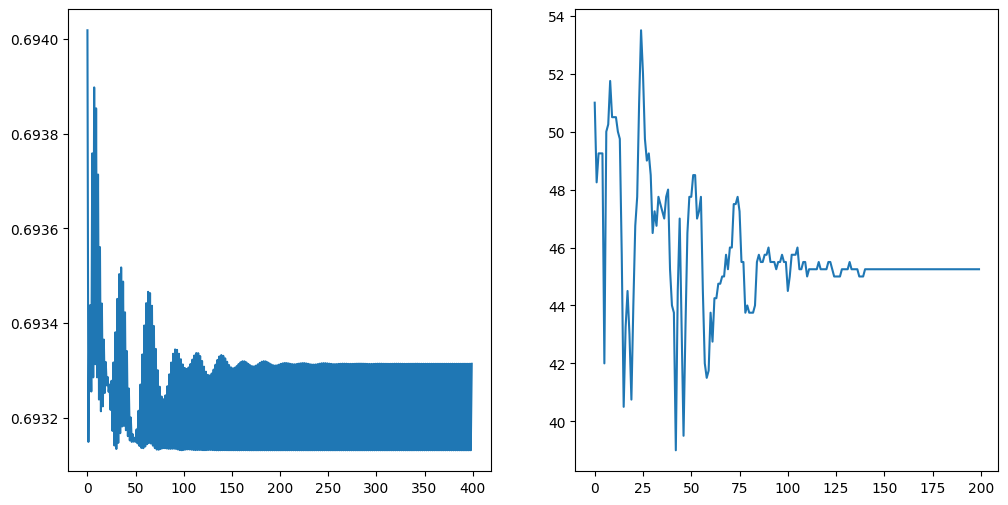

In [135]:
# plot the loss and accuracy curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(loss_values)
plt.subplot(1, 2, 2)
plt.plot(acc_values)
plt.show()

### 3 Evaluate plots

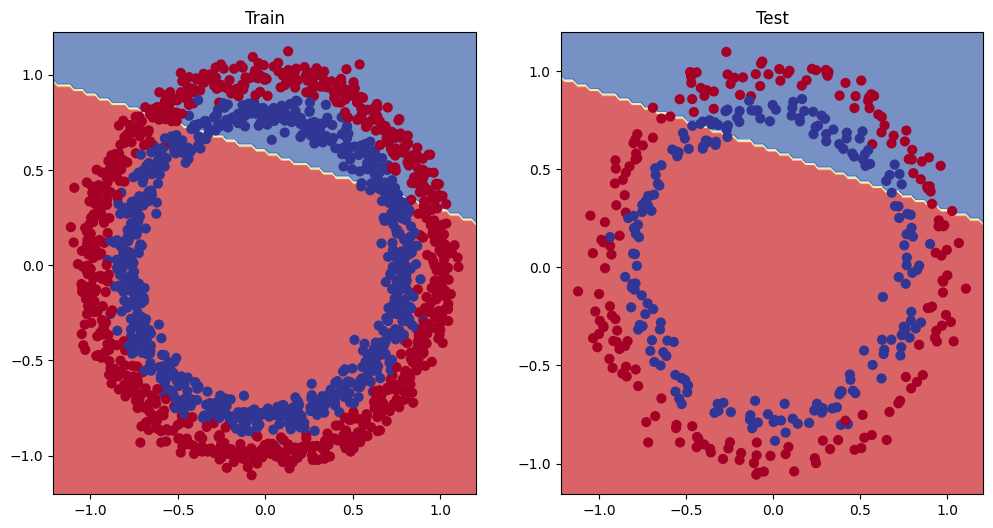

In [136]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_circle, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_circle, X_test, y_test)

It can be observed that the model's capability is limited to splitting the data into two parts, which is due to its linearity. This fact accounts for the 50% accuracy rate, as our circular data can only be cut in half by a straight line at best.

In machine learning terminology, we say that our model is underfitting, indicating that it is unable to learn the predictive patterns from the data.

What are some ways to enhance the model's performance?

## How can we improve a model? 


| Model improvement technique* | What does it do? |
| ----- | ----- |
| **Add more layers** | Each layer *potentially* increases the learning capabilities of the model with each layer being able to learn some kind of new pattern in the data, more layers is often referred to as making your neural network *deeper*. |
| **Add more hidden units** | Similar to the above, more hidden units per layer means a *potential* increase in learning capabilities of the model, more hidden units is often referred to as making your neural network *wider*. |
| **Fitting for longer (more epochs)** | Your model might learn more if it had more opportunities to look at the data. |
| **Changing the activation functions** | Some data just can't be fit with only straight lines (like what we've seen), using non-linear activation functions can help with this (hint, hint). |
| **Change the learning rate** | Less model specific, but still related, the learning rate of the optimizer decides how much a model should change its parameters each step, too much and the model overcorrects, too little and it doesn't learn enough. |
| **Change the loss function** | Again, less model specific but still important, different problems require different loss functions. For example, a binary cross entropy loss function won't work with a multi-class classification problem. |

#### Even if we add more layers/ change activation the proposed first model is still liniar
#### Extra excercise (Not mandatory) build a circle_02 model with said improvements

## Introduce non-liniarity in the model
hat do you think will happen when we introduce the capability for our model to use **non-linear actviation functions**?

Well let's see.

PyTorch has a bunch of [ready-made non-linear activation functions](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity) that do similiar but different things. 

One of the most common and best performing is [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks) (rectified linear-unit, [`torch.nn.ReLU()`](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)).

Rather than talk about it, let's put it in our neural network between the hidden layers in the forward pass and see what happens.

In [137]:
# Create a toy tensor (similar to the data going into our model(s))
input_dummy = torch.arange(-10, 10, 1, dtype=torch.float32).to(device)
input_dummy

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.], device='cuda:0')

In [139]:
def relu(x):
  return torch.maximum(torch.tensor(0), x) # inputs must be tensors

# Pass toy tensor through ReLU function
relu(input_dummy)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.], device='cuda:0')

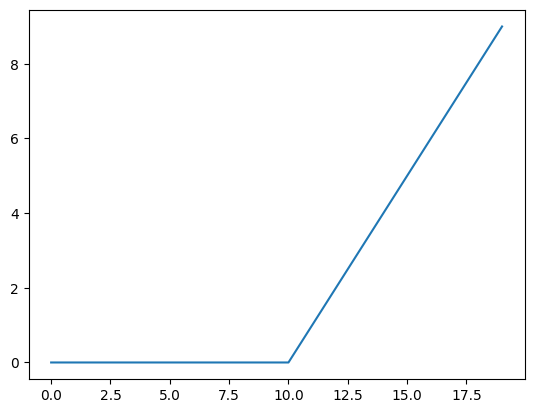

In [143]:
plt.plot(relu(input_dummy).cpu().numpy())

In [51]:
# Ex 6 Recreate the model with some none linear activation functions

In [52]:
# Ex 7 Recreate the optimizer and training loop

In [53]:
# Ex 8 Evaluate vizual

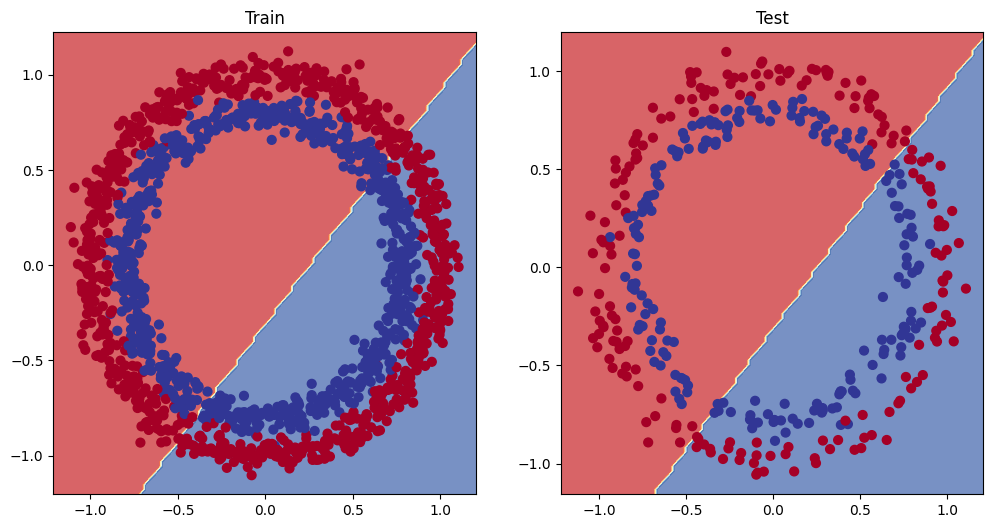

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_circle, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_circle, X_test, y_test)

# Multiclass classification

We will create a dataset using make blobs method. The centers are the number of classes we are targeting in this case 4. In our final model the number of clusters is the number of output features for our final layer 
nn.Linear(in_features=hidden_units, out_features=4)

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


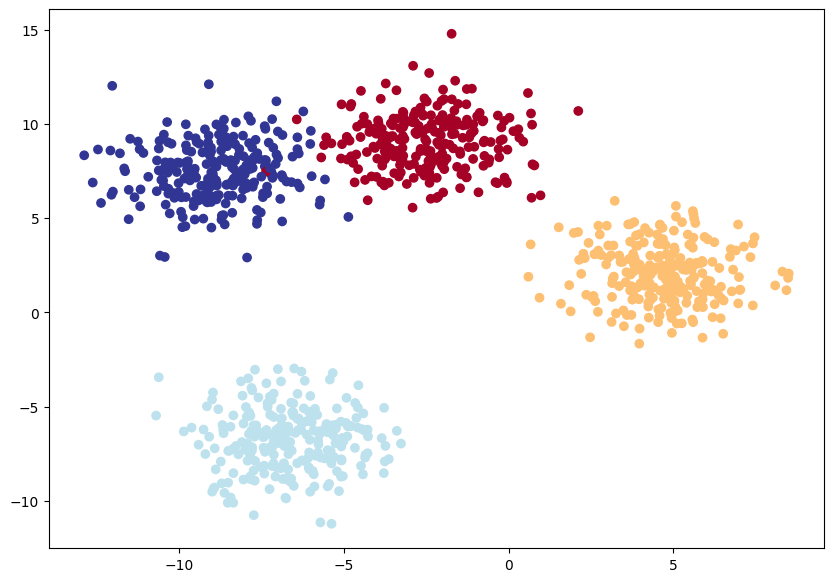

In [ ]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels 
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [56]:
# Ex 9 (For grade 10): Create a pytorch flow to do multi class classification as instructed in the previos examples

# Tip since the data presents itself as a having liniar relationships no relu/sigmoid activation are required.


# Further Reading
## Deep Learning
https://www.youtube.com/watch?v=7sB052Pz0sQ
## Torch
* https://pytorch.org/tutorials/beginner/nn_tutorial.html
## Gradients& Linear Algebra
* https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21